#links 

[run v4 colab](https://colab.research.google.com/drive/12QusaaRj_lUwCGDvQNfICpa7kA7_a2dE#scrollTo=G9Fv0wjCMPYY)
|| [link for yt](https://www.youtube.com/watch?v=mKAEGSxwOAY)
<br>
[train v4 colab](https://colab.research.google.com/drive/1_GdoqCJWXsChrOiY8sZMr_zbr_fH-0Fg?usp=sharing#scrollTo=SWjNcjfcXKgx) || [yt link](https://www.youtube.com/watch?v=mmj3nxGT2YQ)


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [8]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv

#Train on yolov4

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-basketball.cfg yolov4.conv.137 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.944335), count: 1, class_loss = 0.000014, iou_loss = 0.618354, total_loss = 0.618368 
 total_bbox = 1919058, rewritten_bbox = 0.000104 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.879831), count: 8, class_loss = 0.117277, iou_loss = 45.222973, total_loss = 45.340248 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.928399), count: 5, class_loss = 0.000215, iou_loss = 6.504775, total_loss = 6.504990 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 1919071, rewritten_bbox = 0.000104 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.852486), count: 8, class_loss = 0.171738, iou_loss = 44.425240, total_loss = 44.5969

In [1]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

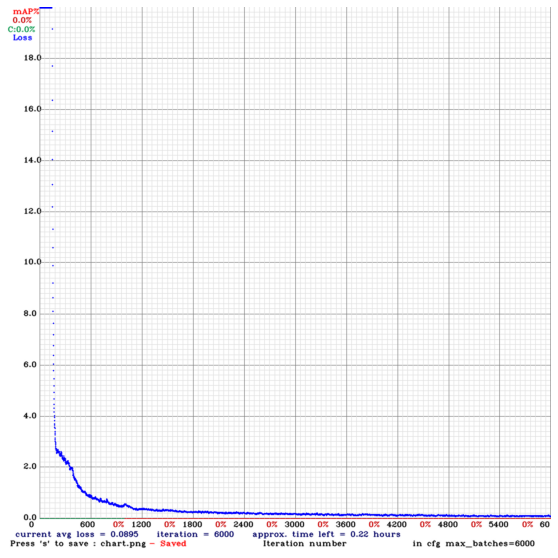

In [6]:
imShow('chart.png')

#Demo for vid on yolov4

In [9]:
!./darknet detector demo data/obj.data cfg/yolov4-basketball.cfg /content/drive/MyDrive/School/capstone/yolov4/darknet/backup/yolov4-basketball_final.weights /content/drive/MyDrive/School/capstone/randompics/vid2.mp4 -thresh 0.8 -dont_show -out_filename /content/drive/MyDrive/School/capstone/randompics/vid2_yolov4_demo.mp4

Streaming output truncated to the last 5000 lines.
 cvWriteFrame 
Objects:


FPS:26.7 	 AVG_FPS:27.6

 cvWriteFrame 
Objects:


FPS:26.6 	 AVG_FPS:27.6

 cvWriteFrame 
Objects:


FPS:26.6 	 AVG_FPS:27.6

 cvWriteFrame 
Objects:


FPS:26.4 	 AVG_FPS:27.6

 cvWriteFrame 
Objects:


FPS:26.1 	 AVG_FPS:27.6

 cvWriteFrame 
Objects:


FPS:25.9 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.7 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.7 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.6 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.6 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.6 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.5 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.4 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.4 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.6 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.5 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.4 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:25.5 	 AVG_FPS:26.6

 cvWriteFrame 
Objects:


FPS:2

#Test model

In [5]:
%cd /content/drive/MyDrive/School/capstone/yolov4/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/drive/MyDrive/School/capstone/yolov4/darknet


In [14]:
!./darknet detector test data/obj.data cfg/yolov4-basketball.cfg /content/drive/MyDrive/School/capstone/yolov4/darknet/backup/yolov4-basketball_final.weights -dont_show result.json < data/test.txt

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF

In [15]:
download('result.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>